In [1]:
from docarray import Document, DocumentArray
import weaviate
from weaviate import WeaviateClient, ConnectionParams, ProtocolParams

c:\Users\CharbelMazloum\Desktop\weaviate\.venv\lib\site-packages\weaviate\__init__.py:144: DeprecationWarning: Dep010: Importing ConnectionParams from weaviate is deprecated. Import ConnectionParams from its module: weaviate.connect
  _Warnings.root_module_import(name, map_[name])
c:\Users\CharbelMazloum\Desktop\weaviate\.venv\lib\site-packages\weaviate\__init__.py:144: DeprecationWarning: Dep010: Importing ProtocolParams from weaviate is deprecated. Import ProtocolParams from its module: weaviate.connect
  _Warnings.root_module_import(name, map_[name])


In [2]:
import pandas as pd
food_meta_data = pd.read_csv('Food Ingredients and Recipe Dataset with Image Name Mapping1.csv')
food_meta_data.head()

id                                              Title  \
0   0  Miso-Butter Roast Chicken With Acorn Squash Pa...   
1   1                    Crispy Salt and Pepper Potatoes   
2   2                        Thanksgiving Mac and Cheese   
3   3                 Italian Sausage and Bread Stuffing   
4   4                                       Newton's Law   

                                         Ingredients  \
0  ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...   
1  ['2 large egg whites', '1 pound new potatoes (...   
2  ['1 cup evaporated milk', '1 cup whole milk', ...   
3  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
4  ['1 teaspoon dark brown sugar', '1 teaspoon ho...   

                                        Instructions  \
0  Pat chicken dry with paper towels, season all ...   
1  Preheat oven to 400°F and line a rimmed baking...   
2  Place a rack in middle of oven; preheat to 400...   
3  Preheat oven to 350°F with rack in middle. Gen...   
4  Stir together brown sugar and hot water in a c...   

                                          Image_Name  \
0  miso-butter-roast-chicken-acorn-squash-panzanella   
1         crispy-salt-and-pepper-potatoes-dan-kluger   
2         thanksgiving-mac-and-cheese-erick-williams   
3          italian-sausage-and-bread-stuffing-240559   
4                 newtons-law-apple-bourbon-cocktail   

                                 Cleaned_Ingredients  
0  ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...  
1  ['2 large egg whites', '1 pound new potatoes (...  
2  ['1 cup evaporated milk', '1 cup whole milk', ...  
3  ['1 (¾- to 1-pound) round Italian loaf, cut in...  
4  ['1 teaspoon dark brown sugar', '1 teaspoon ho...

In [3]:
#replace the name of data['Unnamed: 0'] to 'id'
food_meta_data.rename(columns={'Unnamed: 0':'id'}, inplace=True)
food_meta_data.to_csv('Food Ingredients and Recipe Dataset with Image Name Mapping1.csv', index=False)

In [30]:
#images for DATA_DIR = r"C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food Images"
DATA_DIR = r"C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food Images"
import os
count = 0
#remove images that are not in the csv file
for image in os.listdir(DATA_DIR):
    image_name = image.split('.')[0]
    if image_name not in food_meta_data['Image_Name'].values:
        count+=1
        os.remove(os.path.join(DATA_DIR,image))
        continue
print(count)



0


In [31]:
MAX_DOCS = 1000
DATA_DIR = r"C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food Images"
# DATA_DIR = r"C:\Users\CharbelMazloum\Desktop\weaviate\data"
DATA_PATH = f"{DATA_DIR}/*.jpg"
QUERRY_IMAGE = r"C:\Users\CharbelMazloum\Desktop\weaviate\data\134.jpg"

In [4]:
http_params = ProtocolParams(host='localhost', port=8080, secure=False)
grpc_params = ProtocolParams(
    host='localhost',
    port=9090,  
    secure=False
)
connection_params = ConnectionParams(
    http=http_params,
    grpc=grpc_params
)
client = weaviate.connect_to_local()
# client = WeaviateClient(connection_params)
# config = {
#     'client':client,
#     'name' :'Image'
# }

docs = DocumentArray(storage = 'weaviate')#, config=config).summary()#{'host':'localhost','port':'8080','name':'Image'}


c:\Users\CharbelMazloum\Desktop\weaviate\.venv\lib\site-packages\docarray\array\storage\weaviate\backend.py:124: DeprecationWarning: 
Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Python client v4 `weaviate.WeaviateClient` connections and methods.
                - For Python Client v4 usage, see: https://weaviate.io/developers/weaviate/client-libraries/python
                - For code migration, see: https://weaviate.io/developers/weaviate/client-libraries/python/v3_v4_migration

            If you have to use v3 code, install the v3 client and pin the v3 dependency in your requirements file: `weaviate-client>=3.26.7;<4.0.0`
  self._client = weaviate.Client(
c:\Users\CharbelMazloum\Desktop\weaviate\.venv\lib\site-packages\weaviate\warnings.py:162: DeprecationWarning: Dep016: Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
      

In [99]:
#images for DATA_DIR = r"C:\Users\CharbelMazloum\Desktop\weaviate\data"

import os
for folder in os.listdir(DATA_DIR):
    count = 0
    for image in os.listdir(os.path.join(DATA_DIR,folder)):
        print(os.path.join(DATA_DIR,folder,image))
        doc = Document(
            uri = os.path.join(DATA_DIR,folder,image),
            tags = {'label': folder}
        )
        docs.append(doc)
        count += 1
        if count == 10:
            break   


C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1005649.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1011328.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\101251.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1014775.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1026328.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1028787.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1034399.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\103801.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1038694.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\apple_pie\1043283.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\baby_back_ribs\1005066.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\baby_back_ribs\1005293.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\baby_back_ribs\1007102.jpg
C:\Users\CharbelMazloum\Desktop\weaviate\data\baby_back_ribs\1007272.jpg
C:\Users\CharbelMazloum\Deskto

In [56]:
# images for DATA_DIR = r"C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food Images"

# add the images to the weaviate with the tags0
import os
count = 0
for image in os.listdir(DATA_DIR):
    image_name = image.split('.')[0]
    row = food_meta_data[food_meta_data['Image_Name']==image_name]
    title = row['Title']
    ingrediants = row['Ingredients']
    instructions = row['Instructions']
    cleaned_ingrediants = row['Cleaned_Ingredients']
    doc = Document(
        uri = os.path.join(DATA_DIR,image),
        tags = {'title':title,'ingrediants':ingrediants,'instructions':instructions,'cleaned_ingrediants':cleaned_ingrediants}
    )
    docs.append(doc)
    count += 1
    if count == 1000:
        break   


KeyError: 0

In [35]:

print(f"{len(docs)} documents loaded from {DATA_DIR}")

1000 documents loaded from C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food Images


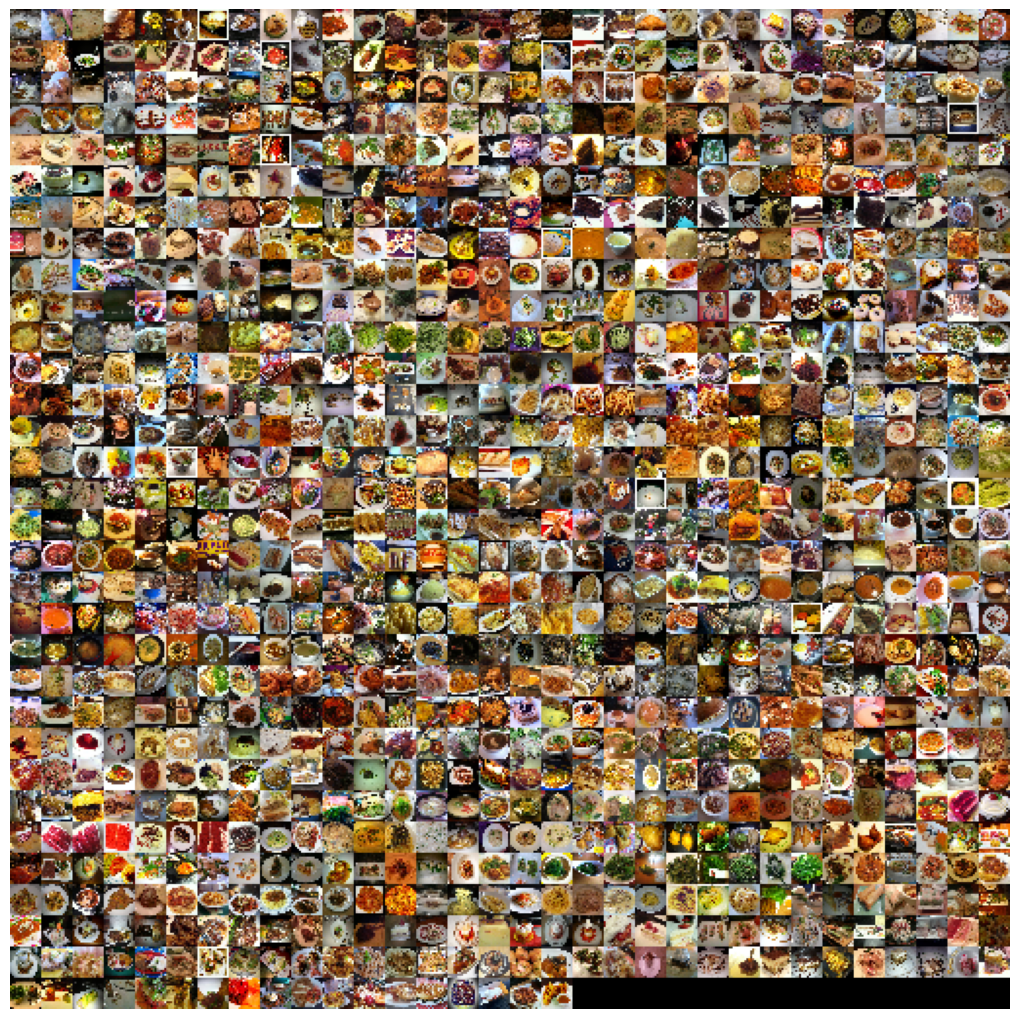

In [101]:
docs.plot_image_sprites()

In [36]:
def preprocess(d: Document):
    return (d.load_uri_to_image_tensor() # load image from uri to tensor
            .set_image_tensor_shape((80,60))  # resize image to 80x60 so it fits into the model input 
            .set_image_tensor_normalization()   # normalize the image tensor to be in [0,1] range
            .set_image_tensor_channel_axis(-1,0))  # move the channel axis to the first dimension ex: from (H,W,C) to (C,H,W) (80,60,3) -> (3,80,60)

In [37]:
docs.apply(preprocess)

╭─────────────────────────── Documents Summary ───────────────────────────╮
│                                                                         │
│   Type                   DocumentArrayWeaviate                          │
│   Length                 1000                                           │
│   Homogenous Documents   True                                           │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'tags')   │
│   Multimodal dataclass   False                                          │
│                                                                         │
╰─────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   id          ('str',)       1000             False             │
│   mime_type   ('str',)       1                False             │
│   tags        ('dict',)      1000             False             │
│   tensor      ('ndarray',)   1000             False             │
│   uri         ('str',)       1000             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭──────────────────── DocumentArrayWeaviate Config ────────────────────╮
│                                                                      │
│   host                       localhost                               │
│   port                       8080                                    │
│   protocol                   http                                    │
│   name                       Class337015efd30a49a9a17149f2a8bcd001   │
│   list_like                  True                                    │
│   serialize_config           {}                                      │
│   n_dim                      None                                    │
│   ef                         None                                    │
│   ef_construction            None                                    │
│   timeout_config             (10, 60)                                │
│   max_connections            None                                    │
│   dynamic_ef_min             None                                    │
│   dynamic_ef_max             None                                    │
│   dynamic_ef_factor          None                                    │
│   vector_cache_max_objects   None                                    │
│   flat_search_cutoff         None                                    │
│   cleanup_interval_seconds   None                                    │
│   skip                       None                                    │
│   columns                    {}                                      │
│   distance                   None                                    │
│   batch_size                 50                                      │
│   dynamic_batching           False                                   │
│   root_id                    True                                    │
│                                                                      │
╰──────────────────────────────────────────────────────────────────────╯

In [38]:
import torch
if torch.cuda.is_available():
    print('CUDA is available. Using GPU')
    device = 'cuda'
else:
    print('CUDA is not available. Using CPU')
    device = 'cpu'

CUDA is available. Using GPU


In [39]:
import torchvision.models as models
model = models.resnet50(pretrained=True)

c:\Users\CharbelMazloum\Desktop\weaviate\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\CharbelMazloum\Desktop\weaviate\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
docs.embed(model, device=device, batch_size=20)

╭───────────────────────────────── Documents Summary ──────────────────────────────────╮
│                                                                                      │
│   Type                   DocumentArrayWeaviate                                       │
│   Length                 1000                                                        │
│   Homogenous Documents   True                                                        │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'tags', 'embedding')   │
│   Multimodal dataclass   False                                                       │
│                                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('Tensor',)    1000             False             │
│   id          ('str',)       1000             False             │
│   mime_type   ('str',)       1                False             │
│   tags        ('dict',)      1000             False             │
│   tensor      ('ndarray',)   1000             False             │
│   uri         ('str',)       1000             False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭──────────────────── DocumentArrayWeaviate Config ────────────────────╮
│                                                                      │
│   host                       localhost                               │
│   port                       8080                                    │
│   protocol                   http                                    │
│   name                       Class337015efd30a49a9a17149f2a8bcd001   │
│   list_like                  True                                    │
│   serialize_config           {}                                      │
│   n_dim                      None                                    │
│   ef                         None                                    │
│   ef_construction            None                                    │
│   timeout_config             (10, 60)                                │
│   max_connections            None                                    │
│   dynamic_ef_min             None                                    │
│   dynamic_ef_max             None                                    │
│   dynamic_ef_factor          None                                    │
│   vector_cache_max_objects   None                                    │
│   flat_search_cutoff         None                                    │
│   cleanup_interval_seconds   None                                    │
│   skip                       None                                    │
│   columns                    {}                                      │
│   distance                   None                                    │
│   batch_size                 50                                      │
│   dynamic_batching           False                                   │
│   root_id                    True                                    │
│                                                                      │
╰──────────────────────────────────────────────────────────────────────╯

In [41]:
docs[:,'tensor'] = None

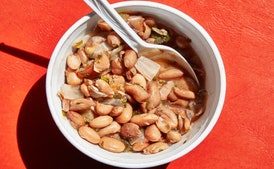

In [48]:
# querry_doc = Document(uri=r"C:\Users\CharbelMazloum\Desktop\weaviate\data\waffles\3138.jpg")
querry_doc = Document(uri=r"C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food Images\2m-smokehouse-charro-beans.jpg")

querry_doc.display()


In [49]:
querry_doc = preprocess(querry_doc)
querry_doc.embed(model, device=device)

📄 Document: 7870a4f3bd2dbd62e28fa49ee95b6afe
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tensor    │ <class 'numpy.ndarray'> in shape (3, 80, 60), dtype: float32     │
│ mime_type │ image/jpeg                                                       │
│ uri       │ C:\Users\CharbelMazloum\Desktop\weaviate\Food Images\Food        │
│           │ Images\2m-smokehouse-charro-beans.jpg                            │
│ embedding │ <class 'torch.Tensor'> in shape (1000,), dtype: float32          │
╰───────────┴──────────────────────────────────────────────────────────────────╯

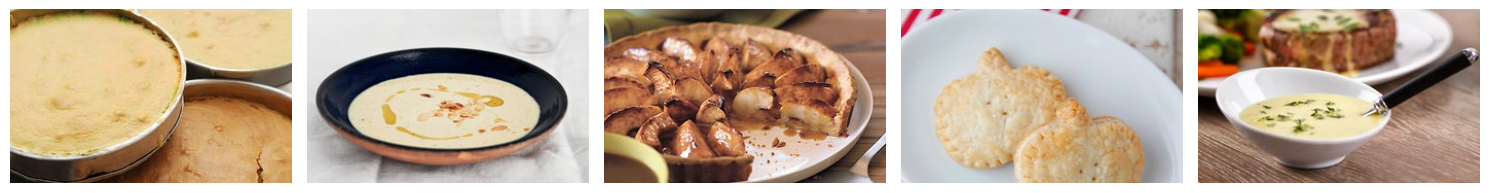

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

top10 = docs.find(querry_doc, metric='cosine', limit=5)

num_images = len(top10[0])
fig,axes = plt.subplots(1, num_images, figsize=(15, 5))
for i, doc in enumerate(top10[0]):
    img = mpimg.imread(doc.uri)
    axes[i].imshow(img)
    axes[i].axis('off')
    label = doc.tags['label']
    axes[i].set_title(f'{label}')
plt.tight_layout()
plt.show()



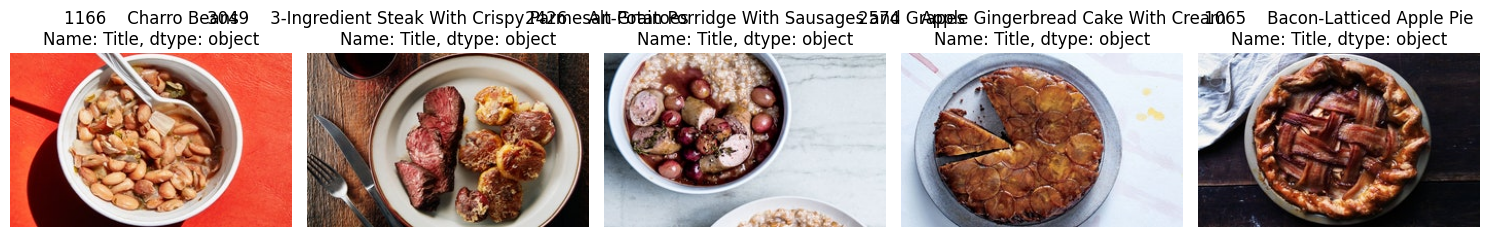

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

top10 = docs.find(querry_doc, metric='cosine', limit=5)

num_images = len(top10[0])
fig,axes = plt.subplots(1, num_images, figsize=(15, 5))
for i, doc in enumerate(top10[0]):
    img = mpimg.imread(doc.uri)
    axes[i].imshow(img)
    axes[i].axis('off')
    title = doc.tags['title']
    ingrediants = doc.tags['ingrediants']
    instructions = doc.tags['instructions']
    cleaned_ingrediants = doc.tags['cleaned_ingrediants']
    axes[i].set_title(f'{title}')
plt.tight_layout()
plt.show()

# 'title':title,'ingrediants':ingrediants,'instructions':instructions,'cleaned_ingrediants':cleaned_ingrediants